In [1]:
import pandas as pd

In [2]:
data_raw = pd.read_csv("notes.csv")

# Mission 0: description des données

In [9]:
data_raw.head(10)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,True,171.83,103.76,103.76,4.40,2.88,113.84
3,True,171.80,103.78,103.65,3.73,3.12,113.63
4,True,172.05,103.70,103.75,5.04,2.27,113.55
5,True,172.57,104.65,104.44,4.54,2.99,113.16
6,True,172.38,103.55,103.80,3.97,2.90,113.30
7,True,171.58,103.65,103.37,3.54,3.19,113.38
8,True,171.96,103.51,103.75,4.06,3.33,113.53
9,True,172.14,104.34,104.20,4.63,3.02,112.47


In [8]:
data_raw.shape

(170, 7)

In [6]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 7 columns):
is_genuine      170 non-null bool
diagonal        170 non-null float64
height_left     170 non-null float64
height_right    170 non-null float64
margin_low      170 non-null float64
margin_up       170 non-null float64
length          170 non-null float64
dtypes: bool(1), float64(6)
memory usage: 8.3 KB


In [11]:
data_raw.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,171.940588,104.066353,103.928118,4.612118,3.170412,112.570412
std,0.305768,0.298185,0.330980,0.702103,0.236361,0.924448
min,171.040000,103.230000,103.140000,3.540000,2.270000,109.970000
25%,171.730000,103.842500,103.690000,4.050000,3.012500,111.855000
50%,171.945000,104.055000,103.950000,4.450000,3.170000,112.845000
75%,172.137500,104.287500,104.170000,5.127500,3.330000,113.287500
max,173.010000,104.860000,104.950000,6.280000,3.680000,113.980000


In [10]:
data_raw.describe(include=['object', 'bool'])

,is_genuine
count,170
unique,2
top,True
freq,100


In [12]:
import seaborn as sns

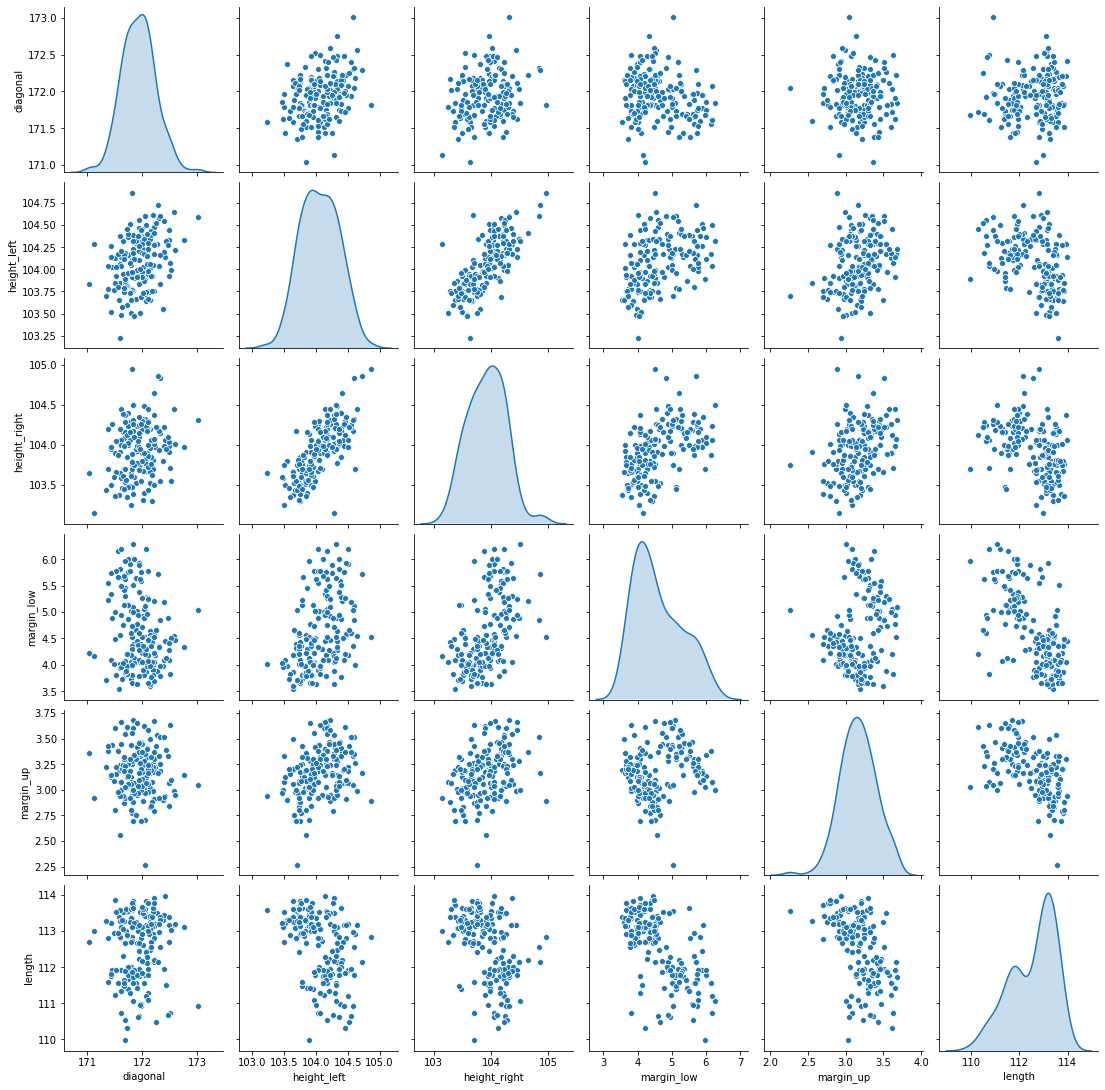

In [16]:
_ = sns.pairplot(
    data=data_raw.loc[:,"diagonal":"length"],
    kind="scatter",
    diag_kind="kde",
)

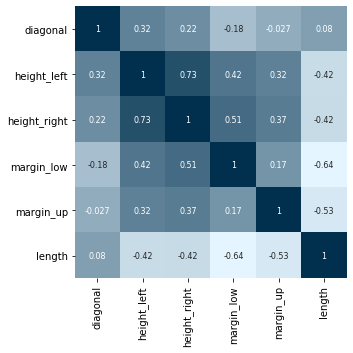

In [22]:
import matplotlib.pyplot as plt
import numpy as np

corr = data_raw.loc[:,"diagonal":"length"].corr()
_, ax = plt.subplots(figsize=(5, 5))


_ = sns.heatmap(
    corr, 
    cmap=sns.light_palette("#00304e", as_cmap=True), 
    square=True, 
    cbar=False, 
    ax=ax, 
    annot=True, 
    annot_kws={"fontsize": 8},
)

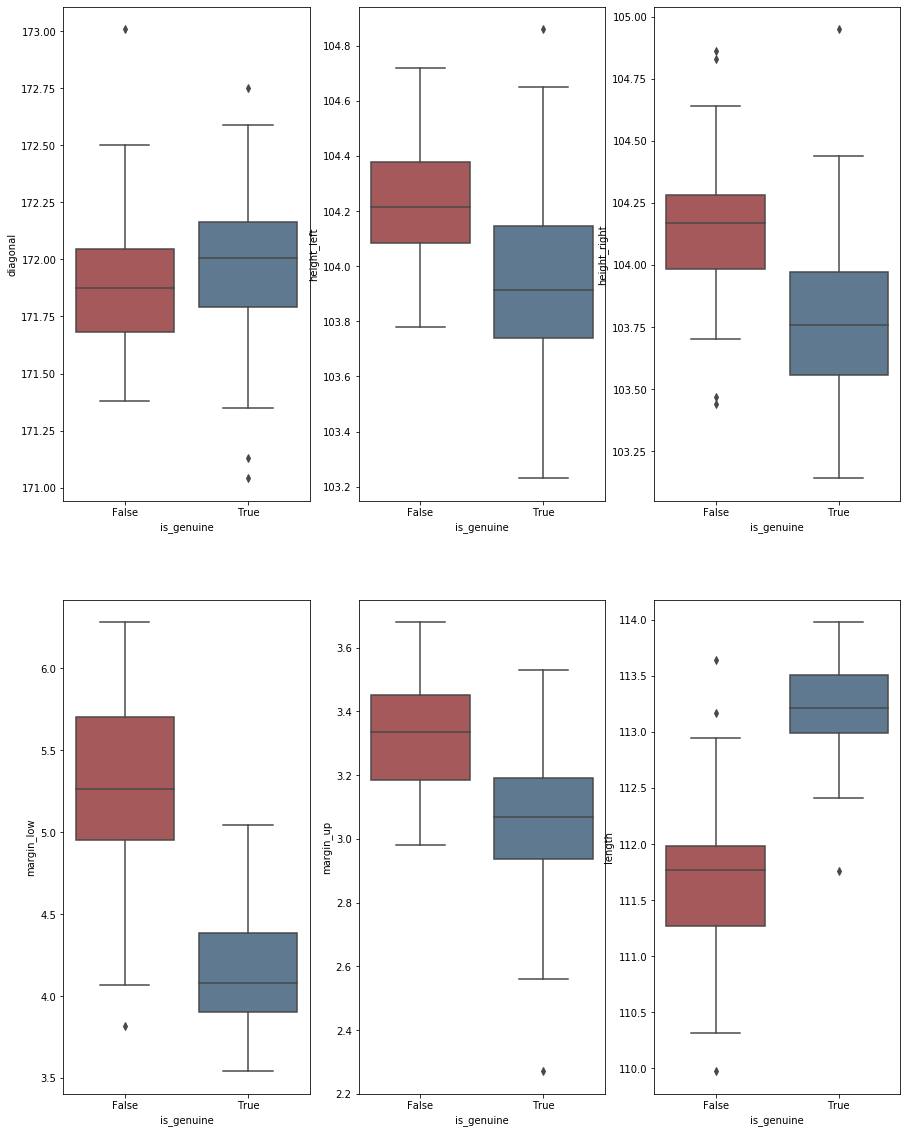

In [27]:
_, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 20))

for f, ax in zip(data_raw.loc[:,"diagonal":"length"].columns, axes.ravel()):
        _ = sns.boxplot(
        data=data_raw, 
        y=f, 
        x='is_genuine', 
        ax=ax, 
        palette=sns.color_palette("Set1", n_colors=6, desat=.5)
    )


# Mission 1: ACP

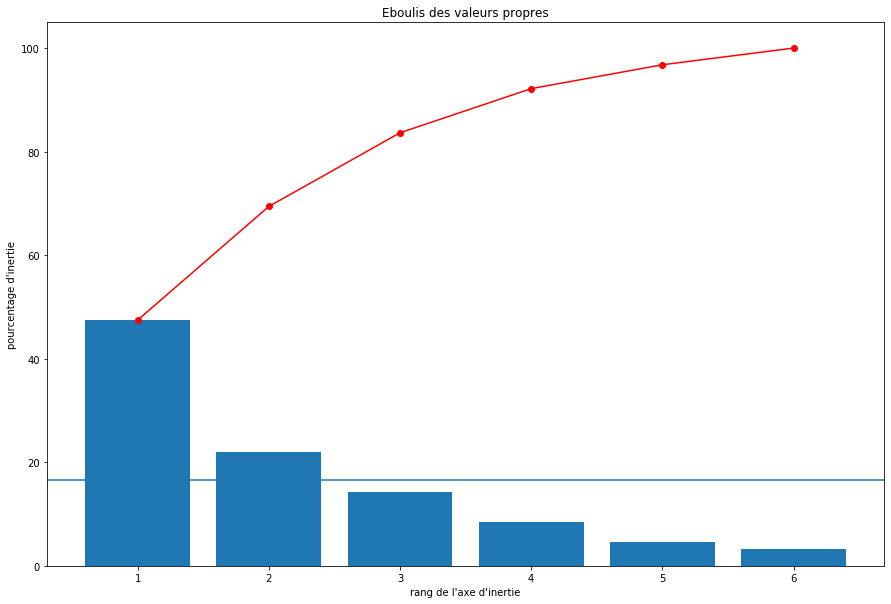

In [31]:
from sklearn import preprocessing, decomposition
from functions import *

X = data_raw.drop(columns=["is_genuine"]).values
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled=std_scale.transform(X)


pca = decomposition.PCA(n_components=6)
pca.fit(X_scaled)

fig1_1 = plt.figure(figsize=(15, 10))
plt.axhline(16.6)
display_scree_plot(pca)

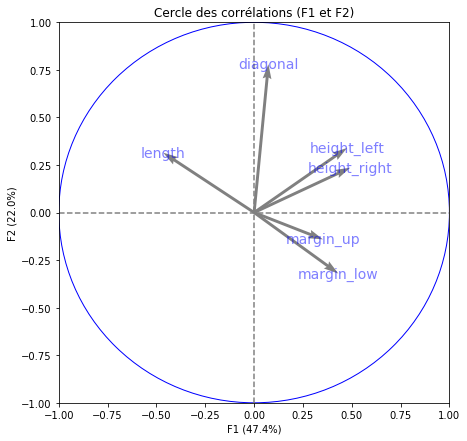

In [34]:
pcs=pca.components_
display_circles(pcs,6,pca,[(0,1)],
                labels=data_raw.loc[:,"diagonal":"length"].columns)

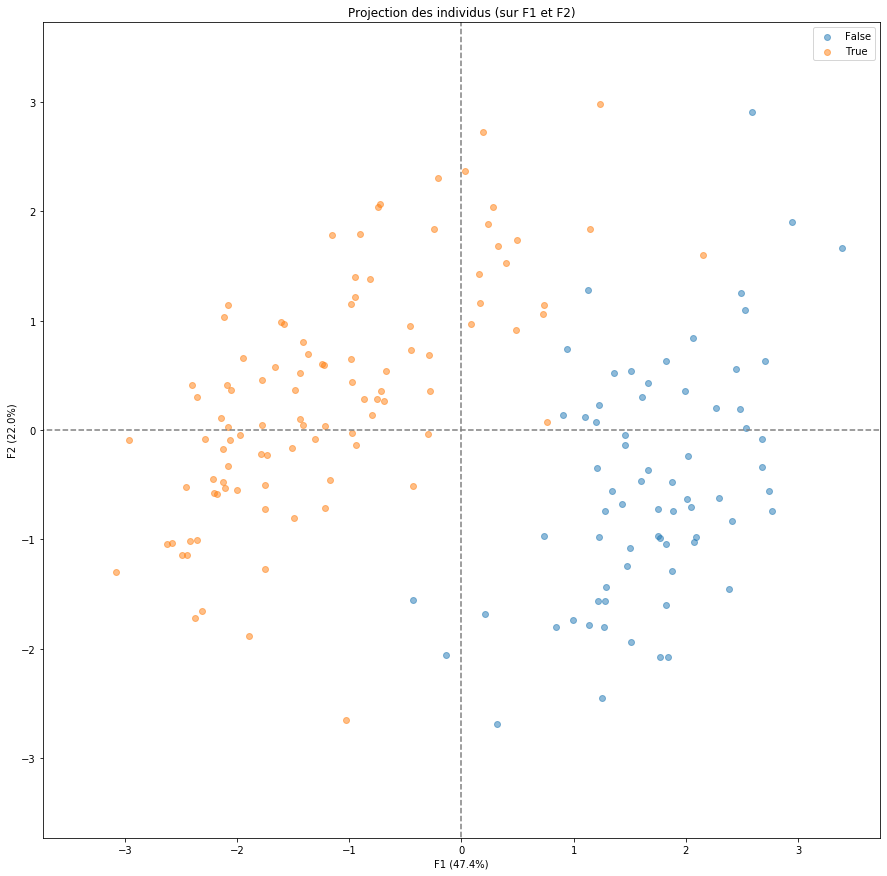

In [35]:
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, 6, pca, [(0,1)], alpha = 0.5, illustrative_var= data_raw['is_genuine'])

In [38]:
X_scaled

array([[-0.42834385,  2.6694537 ,  3.09656321, -0.13159013, -1.18987367,
         0.28163308],
       [-0.88755932, -1.09769709, -0.69125444, -0.86012554, -1.27473985,
         0.78069736],
       [-0.36274164, -1.03042654, -0.50943919, -0.30301023, -1.23230676,
         1.37740465],
       ...,
       [ 1.73652911,  0.68497248,  0.52084721,  0.38267015,  0.67718214,
        -2.05094997],
       [-0.39554274, -0.32408577, -0.1458087 ,  0.16839504,  1.61071005,
        -0.75989238],
       [ 0.06367273, -0.22317994,  0.06630909,  1.45404575,  0.38015054,
        -1.74717171]])

In [43]:
pcs

array([[ 0.07327499,  0.47550205,  0.4918214 ,  0.43102671,  0.35253984,
        -0.46537288],
       [ 0.77963908,  0.33925019,  0.23554253, -0.32053699, -0.14111974,
         0.31453645],
       [-0.08889419,  0.12276016,  0.15383022,  0.5128076 , -0.82114881,
         0.12691346],
       [-0.55973158,  0.2780463 ,  0.45893794, -0.22652773,  0.13533955,
         0.57370304],
       [-0.22509444,  0.71592059, -0.48699285, -0.31190784, -0.1939426 ,
        -0.25441684],
       [ 0.12216606,  0.23213146, -0.4808135 ,  0.54763041,  0.35437971,
         0.52395111]])

In [44]:
pca

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)